**#Phase 1 Project**

Student Name: Lydia Mangoa

Student Pace: Part-time DSF-PT09

Project submission date: 24th November 2024

Instructors: Noah Kandie & Bonface Manyara


# Project title: Evaluating Low-Risk Aircraft Models for Commercial and Private Operations

#1.**Overview and Goal**

This project evaluates aviation accident data to identify low-risk aircraft models suitable for commercial and private operations. The study examines accident frequencies by aircraft type and model, the influence of engine configurations on safety performance, and historical trends in aviation incidents. The objective is to provide actionable insights to guide fleet expansion and operational safety strategies.

#2. **Business Understanding**


##**Stakeholders**

-Head of Aviation Division: Decision-maker for aircraft purchases.

-Leadership Team: Interested in financial viability and risk minimization.

##**Key Business Questions**

1. Which aircraft models demonstrate the lowest accident rates historically?

2. How does the number of engines impact safety performance and fatality rates?

3. What trends in accident data can inform the selection of low-risk aircraft models?

4. How can weather-related factors be considered in fleet and operational decision-making?

##**Source of Data**
The dataset is sourced from the Kaggle Aviation Accident Database Synopses, which includes historical aviation accident data.

#3.**Data Understanding**

In [84]:

#Load the data set
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./AviationData.csv", encoding="ISO-8859-1", low_memory=False)

In [85]:
#Summary of statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [86]:
#Summary of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [87]:
#Quick overview -Showing the first five rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [88]:
#Quick overview- Showing the 5 last rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


#4.**Data Preparation**

###Handle Missing values

In [89]:
#Identify missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)

Missing Values:
 Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date       

In [90]:
# Handle missing categorical values
categorical_columns = [
    "Location", "Country", "Airport.Code", "Airport.Name", "Injury.Severity",
    "Aircraft.Category", "Weather.Condition", "Broad.phase.of.flight",
    "Report.Status", "Schedule", "Purpose.of.flight", "Air.carrier", "Engine.Type", 
    "FAR.Description"
]

In [91]:
# Filter only columns that exist in the DataFrame
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]


In [92]:
# Fill missing categorical values with 'Unknown'
df[existing_categorical_columns] = df[existing_categorical_columns].fillna('Unknown')


In [93]:
# Impute numerical columns with 0
injury_columns = [
    "Total.Fatal.Injuries", "Total.Serious.Injuries", 
    "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"
]
df[injury_columns] = df[injury_columns].fillna(0)

In [94]:
# Convert Latitude and Longitude to numeric and fill NaN with median
for col in ["Latitude", "Longitude"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

In [95]:
# Handle 'Registration.Number' and 'Amateur.Built'
df['Registration.Number'] = df['Registration.Number'].fillna('Unknown')
df['Amateur.Built'] = df['Amateur.Built'].fillna(df['Amateur.Built'].mode()[0])


In [96]:
# Forward-fill or backward-fill dates
df["Publication.Date"] = df["Publication.Date"].fillna(df["Event.Date"])


In [97]:
# Drop rows where critical fields ('Make', 'Model') have missing values
df = df.dropna(subset=['Make', 'Model'])

In [98]:
#Verify there are no remaining missing values
print(df.isnull().sum())

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                     0
Longitude                    0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage           3172
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines            0
Engine.Type                  0
FAR.Description              0
Schedule                     0
Purpose.of.flight            0
Air.carrier                  0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64


# 5. **Data Analysis**

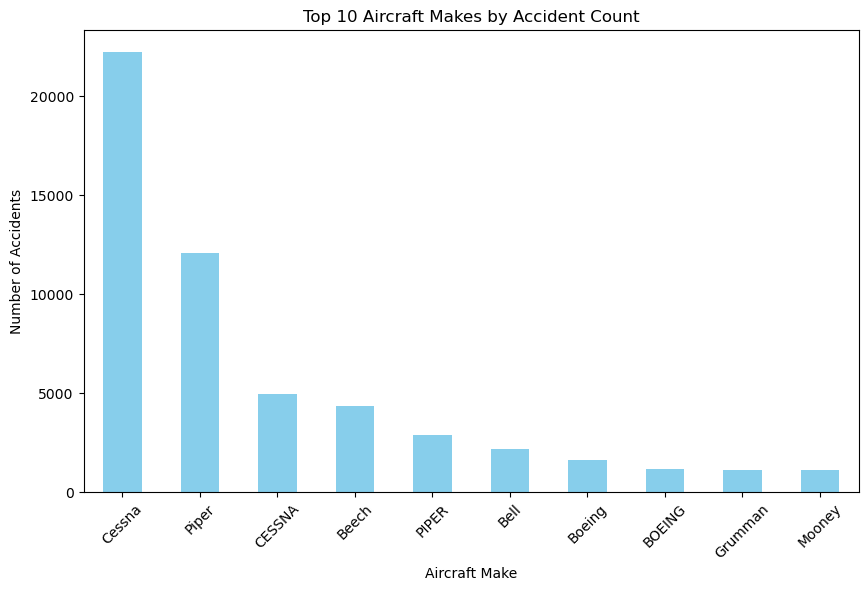

In [99]:
# Top 10 Aircraft Makes by Accident Count
top_makes = df['Make'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_makes.plot(kind='bar', color='skyblue')
plt.title("Top 10 Aircraft Makes by Accident Count")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

The bar chart visualizes the top 10 aircraft makes involved in aviation accidents based on their frequency in the dataset. The purpose is to identify which aircraft manufacturers have had the highest number of reported incidents, providing insight into accident trends by manufacturer. This analysis can guide further investigation into whether specific aircraft models or manufacturers are associated with higher risks. 

The aircraft makes with the highest number of accidents are clearly visible, allowing stakeholders to focus on these manufacturers for further safety assessments. The chart also reveals the disparity in accident counts across manufacturers, suggesting some are more frequently involved than others. It is therefore important for safety audits, maintenance reviews, or training initiatives can be prioritized for the top makes with high accident frequencies in case the company selsects these models.

This visualization serves as a starting point for exploring accident causes and trends related to specific aircraft manufacturers.

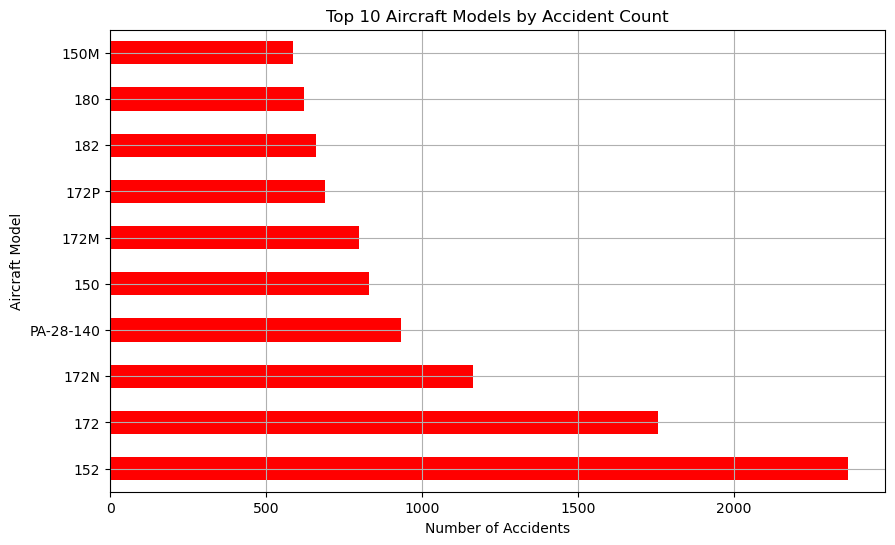

In [100]:
# Top 10 Aircraft Models by Accident Count
top_models = df['Model'].value_counts().head(10)  # Only the top 10 models
plt.figure(figsize=(10, 6))
top_models.plot(kind='barh', color='red')  # 'barh' for horizontal bars
plt.title("Top 10 Aircraft Models by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Aircraft Model")
plt.grid(True)
plt.show()

The graph displays the top 10 aircraft models ranked by the number of accidents reported. Each bar represents the total count of accidents for a specific aircraft model, with the length of the bar indicating the frequency. The horizontal layout helps to clearly compare the accident counts across models. This visualization is meant to support the above finding on aircraft makes. 

Model 152 has the longest bar therefore, experienced the highest number of accidents, potentially indicating widespread use or operational challenges. This means that models such as 152 and 172 and other models with high counts may need further investigation into design, age, or operational factors contributing to accidents. But on the other hand, high accident numbers may also reflect the model's prevalence in the global fleet rather than inherent risk.

Stakeholders can therefore allocate resources to conduct comprehensive safety audits for models appearing frequently in the graph or collaborate with manufacturers and airlines to review maintenance procedures, update safety protocols, or identify potential upgrades for these aircraft.

This visualization can guide decisions about future fleet acquisitions by evaluating which models combine strong safety records with operational efficiency to minimize risk in operations.

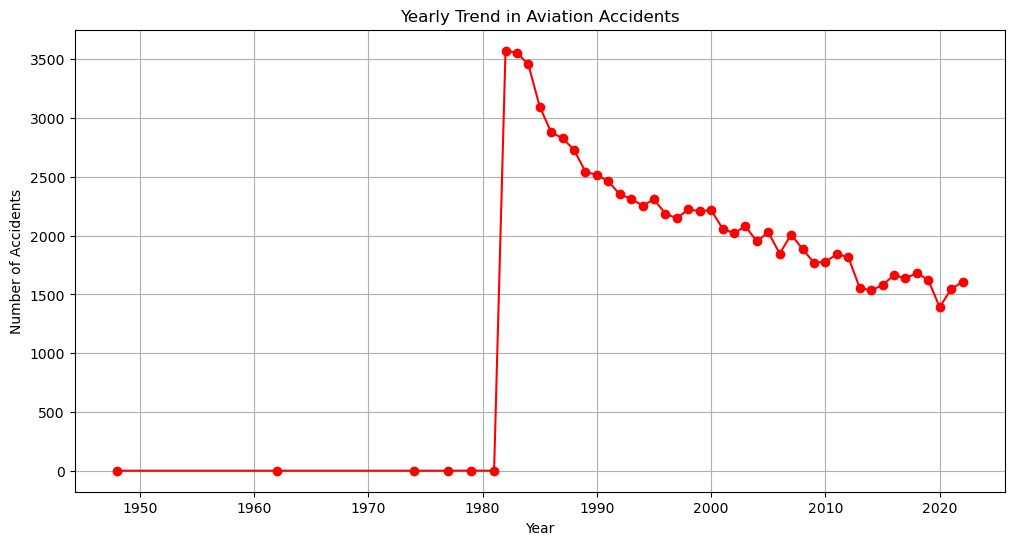

In [101]:
# Yearly Trend in Accidents
# Ensure 'Event.Date' is in datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')

# Extract the year from 'Event.Date'
df['Year'] = df['Event.Date'].dt.year

# Group data by year and count the number of accidents
yearly_accidents = df.groupby('Year').size()

# Plot the yearly trend of aviation accidents
plt.figure(figsize=(12, 6))
yearly_accidents.plot(kind='line', marker='o', color='red')
plt.title("Yearly Trend in Aviation Accidents")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

The line chart shows the yearly trend in aviation accidents, illustrating how the frequency of accidents has changed over time. The purpose is to understand long-term patterns, such as increases or decreases in accidents, and to identify specific years with unusually high or low numbers of incidents. This can help assess the impact of safety regulations, technological advancements, or other factors influencing aviation safety.

The upward trend in the early 1980s might highlight areas needing intervention or investigation or in this case implemetntation of better safety relgulations. The steady decline since the late 1980s, could indicate improvements in aviation safety over the years due to advancements in technology, stricter regulations, or better training. Further, it can be assumed that years with unusually high accident counts may align with historical events such as industry growth, new challenges (e.g., war, global crises), or lapses in safety measures.

Therefore, this visualisation will be important to the Head of the Aviation Division and the company's leadership who can make informed decisions about fleet selection, safety investments, and operational strategies. This data-driven approach ensures that the organization prioritizes aircraft models with better safety records, enhancing overall operational reliability and trustworthiness.

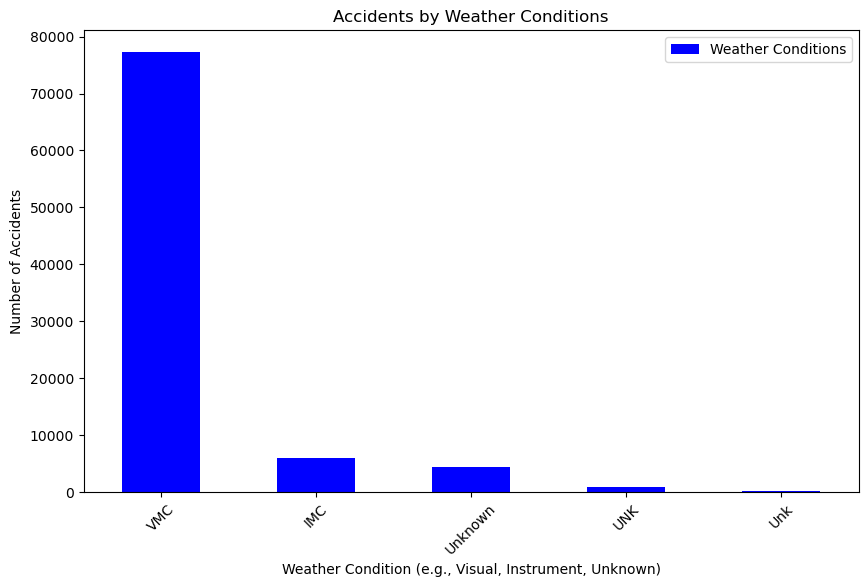

In [102]:
# Plot showing the count of accidents by weather conditions
# Bar chart
weather_accidents = df['Weather.Condition'].value_counts()

plt.figure(figsize=(10, 6))
weather_accidents.plot(kind='bar', color='blue', label="Weather Conditions")

# Adding title and labels
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Condition (e.g., Visual, Instrument, Unknown)")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend()  # Adding a key (legend)
plt.show()


This bar chart illustrates the distribution of aviation accidents by weather conditions, such as visual, instrument, and unknown. The analysis aims to uncover how weather impacts accident frequencies, contributing to the broader goal of identifying low-risk aircraft models for commercial and private operations. Understanding the role of weather in accidents helps stakeholders evaluate the resilience of specific aircraft models and operational procedures under varying weather conditions.

Its quite notable that there is a significant count in the "Unknown" category suggests gaps in reporting or data collection, emphasizing the importance of comprehensive record-keeping.Therefore, the company will have to prioritise this in their expansion plans.

Insights from this visualization guide the Head of the Aviation Division and company leadership in making data-driven decisions regarding aircraft model selection, weather-specific training, and operational strategies. Aircraft models that perform consistently across adverse weather conditions may be prioritized as low-risk options for fleet expansion or replacement.

This visualization therefore equips decision-makers with critical information to enhance safety, optimize operations, and ensure the reliability of aircraft models across various weather scenarios.

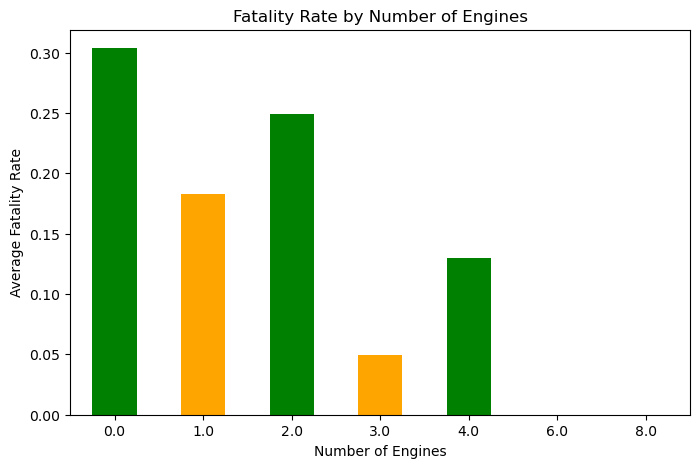

In [103]:
# Compare single-engine vs multi-engine accidents
# Severity mapping
severity_map = {
    "Fatal": 3,
    "Serious": 2,
    "Minor": 1,
    "None": 0,
    "Unknown": -1
}

# Apply severity mapping to create a severity score
df['Severity.Score'] = df['Injury.Severity'].map(severity_map).fillna(-1)

# Create a derived column to classify accidents as fatal or non-fatal
df['Is.Fatal'] = df['Total.Fatal.Injuries'] > 0

# Group by 'Number.of.Engines' to calculate fatality rates
engine_accidents = df.groupby('Number.of.Engines')['Is.Fatal'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 5))
engine_accidents.plot(kind='bar', color=['green', 'orange'])
plt.title("Fatality Rate by Number of Engines")
plt.xlabel("Number of Engines")
plt.ylabel("Average Fatality Rate")
plt.xticks(rotation=0)
plt.show()

This bar chart compares the fatality rates of aviation accidents based on the number of engines (single-engine vs. multi-engine). The analysis aligns with the goal of identifying low-risk aircraft models for commercial and private operations by examining how engine configuration correlates with accident severity. Understanding this relationship can guide stakeholders in assessing the safety and reliability of single-engine and multi-engine aircraft.

On fatality trends, it is notable that Single-engine aircraft may exhibit higher fatality rates due to limited redundancy in engine failure scenarios. On the other hand multi-engine aircraft, designed with additional safety mechanisms, might demonstrate a lower fatality rate, supporting their suitability for commercial operations.

The analysis highlights the need to prioritize multi-engine models for operations with a higher safety priority, such as passenger transport.But if the company decides to go with the single-engine models, emphasis can be placed on improving reliability, maintenance practices, and pilot training to mitigate risks.

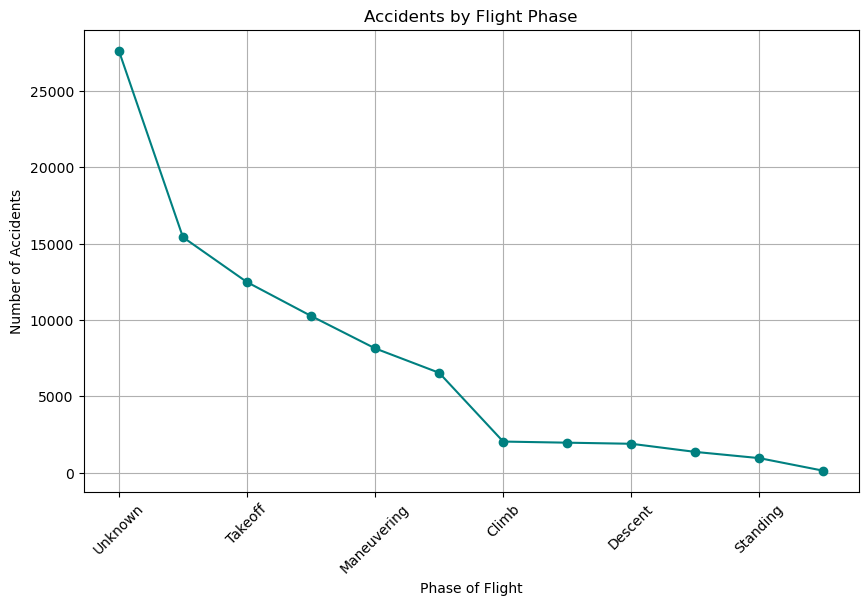

In [104]:
# Line plot for accidents by flight phases
# Handle missing values in 'Broad.phase.of.flight'

flight_phase_accidents = df['Broad.phase.of.flight'].dropna().value_counts()

plt.figure(figsize=(10, 6))
flight_phase_accidents.sort_values(ascending=False).plot(kind='line', marker='o', color='teal')
plt.title("Accidents by Flight Phase")
plt.xlabel("Phase of Flight")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The line graph above shows the number of accidents occurring during different phases of flight, such as takeoff, landing, cruise, and others. Each point on the line represents a specific flight phase, with the vertical position indicating the total accident count. The line connects these points to highlight trends or patterns across the phases therefore providing a clear visual representation of which phases are most accident-prone, emphasizing where safety measures need prioritization.

Peaks in the graph indicate flight phases with the highest accident counts. For instance, takeoff and landing are typically associated with higher accident frequencies due to the complexity and critical nature of these phases. On the other hand, phases with fewer accidents, such as cruise, suggest relatively stable conditions during these portions of the flight.


The visualisation therefore can help the company to direct safety initiatives, training programs, and procedural improvements toward high-risk phases like takeoff and landing. This can encompass enhanced technology, such as automated landing systems or takeoff assistance, can be implemented to mitigate risks. Training programs can emphasize skill development for critical flight phases, such as handling emergencies during takeoff or landing. In general, aircraft models with fewer accidents in high-risk phases can be considered low-risk and prioritized for both commercial and private operations.


#6. **Conclusion**
Key findings:

-Aircraft Safety: Certain models (e.g., Cessna and piper) have a higher number of accidents but could reflect higher usage rather than risk.

-Trends Over Time:Accident frequencies have declined over the years, indicating advancements in technology and improved safety regulations.

-Engine Configuration and Safety:Aircraft with multiple engines generally show lower average fatality rates compared to single-engine aircraft. This suggests that redundancy in engines enhances safety, potentially offering more options in emergencies, such as engine failure.

-Flight Phases: Takeoff and landing are the most accident-prone phases, while cruise is generally stable, this therefore shows where safety improvements should focus.

-Weather Conditions: Most accidents occur under unknown or visual weather conditions, suggesting data gaps and the need for better weather-specific operational strategies.

#7. Recommendations

1. Aircraft Selection
-Prioritize Multi-Engine Models: Choose multi-engine aircraft for commercial and high-stakes operations due to their lower fatality rates and enhanced safety in emergencies.
-Focus on Modern Designs: Invest in aircraft that are equipped with advanced navigation, safety systems, and redundancy mechanisms to reduce operational risks
-Comprehensive Audits: Conduct safety and maintenance audits for frequently used models, particularly those with high accident counts, to identify and address vulnerabilities.


2. Safety Enhancements
-Training Programs: Tailor training for high-risk flight phases, such as takeoff and landing, and improve pilot readiness for weather-specific challenges.
-Flight Phase Mitigations: Implement automation technologies, such as advanced landing systems, to reduce risks during critical phases.
-Weather-Resilient Operations: Equip aircraft with state-of-the-art weather detection systems and develop detailed weather-specific operational strategies.

3. Strategic Investments
-Leverage Historical Trends: Utilize the declining accident trend to benchmark best practices and implement modern safety protocols for newly acquired fleets.
-Data-Driven Decisions: Fill data gaps, especially in weather reporting and accident causes, to improve safety assessments and operational decision-making.
-Fleet Modernization: Align fleet acquisitions with safety records, focusing on reliable models that balance operational efficiency with strong safety performance.

#8. Summary

This analysis offers critical insights for decision-makers, helping to balance operational reliability with safety. By addressing high-risk areas through targeted investments and training, the organization can mitigate risks, improve safety outcomes, and foster long-term operational success.

In [107]:
df.to_csv("Aviation data for Tableau.csv")